In [3]:

import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline



In [4]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'JPM', 'BAC', 'LMT']

end_date = datetime.now()
start_date = end_date - \
            timedelta(days=1095) # 3 years of data

tickers = yf.download(tickers, start = start_date, end = end_date,auto_adjust=False)['Adj Close']
tickers = pd.DataFrame(tickers)

[*********************100%***********************]  7 of 7 completed


In [5]:
returns = tickers.pct_change()*100 # Calculate daily returns and drop NaN values
returns = returns.dropna() # Drop NaN values

In [6]:
# Calculate the mean and variance of the returns
mean_returns = returns.mean() # Mean returns
variance_returns = returns.var() # Variance of returns

In [7]:
# Correlation matrix
returns.corr()

Ticker,AAPL,AMZN,BAC,GOOGL,JPM,LMT,MSFT
Ticker,,,,,,,
AAPL,1.000000,0.553445,0.354876,0.591674,0.338008,0.126239,0.651396
AMZN,0.553445,1.000000,0.361347,0.664111,0.350678,0.050596,0.691585
BAC,0.354876,0.361347,1.000000,0.317962,0.792083,0.199215,0.329598
GOOGL,0.591674,0.664111,0.317962,1.000000,0.313681,0.029341,0.660471
JPM,0.338008,0.350678,0.792083,0.313681,1.000000,0.211803,0.325888
LMT,0.126239,0.050596,0.199215,0.029341,0.211803,1.000000,0.045489
MSFT,0.651396,0.691585,0.329598,0.660471,0.325888,0.045489,1.000000


In [8]:
returns

Ticker,AAPL,AMZN,BAC,GOOGL,JPM,LMT,MSFT
Date,,,,,,,
2022-04-05,-1.894197,-2.549209,-1.689956,-1.664994,-1.163744,0.727460,-1.298514
2022-04-06,-1.845082,-3.230012,-1.096176,-2.875725,-1.387424,1.641166,-3.660588
2022-04-07,0.180391,-0.611943,-0.780845,-0.482977,-0.304226,2.404439,0.624365
2022-04-08,-1.190886,-2.106674,0.710829,-1.914080,1.830811,-0.857139,-1.459976
2022-04-11,-2.551563,-2.161395,-0.201644,-3.349155,-0.367070,0.591539,-3.943163
...,...,...,...,...,...,...,...
2025-03-25,1.368189,1.205359,0.487576,1.717560,1.237607,1.629959,0.529159
2025-03-26,-0.992179,-2.226436,-1.062844,-3.224672,-0.039822,0.701248,-1.313393
2025-03-27,1.047266,0.114352,-0.607189,-1.708465,-1.159225,-0.649193,0.156419


In [9]:
# Calculate Annual returns
annual_returns = (1 + mean_returns / 100) ** 252 - 1 # Annual returns
print(annual_returns)


Ticker
AAPL     0.122380
AMZN     0.114658
BAC      0.072578
GOOGL    0.084459
JPM      0.291448
LMT      0.051659
MSFT     0.109527
dtype: float64


In [10]:
# Calculate annual STD
annual_std = tickers.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))# Annual standard deviation
print(annual_std)

Ticker
AAPL     0.268783
AMZN     0.366300
BAC      0.266217
GOOGL    0.325008
JPM      0.240233
LMT      0.207981
MSFT     0.268639
dtype: float64


In [11]:
assets = pd.concat([annual_returns, annual_std], axis=1) # Concatenate annual returns and annual STD
assets.columns = ['Returns', 'Volatility'] # Rename columns
print(assets)

         Returns  Volatility
Ticker                      
AAPL    0.122380    0.268783
AMZN    0.114658    0.366300
BAC     0.072578    0.266217
GOOGL   0.084459    0.325008
JPM     0.291448    0.240233
LMT     0.051659    0.207981
MSFT    0.109527    0.268639


In [12]:
# Calculate Covariance matrix
cov_matrix = tickers.pct_change().apply(lambda x: np.log(1+x)).cov()
print(cov_matrix)

Ticker      AAPL      AMZN       BAC     GOOGL       JPM       LMT      MSFT
Ticker                                                                      
AAPL    0.000289  0.000218  0.000102  0.000207  0.000088  0.000028  0.000188
AMZN    0.000218  0.000537  0.000142  0.000316  0.000124  0.000016  0.000272
BAC     0.000102  0.000142  0.000283  0.000110  0.000202  0.000044  0.000094
GOOGL   0.000207  0.000316  0.000110  0.000423  0.000098  0.000008  0.000230
JPM     0.000088  0.000124  0.000202  0.000098  0.000231  0.000042  0.000084
LMT     0.000028  0.000016  0.000044  0.000008  0.000042  0.000173  0.000010
MSFT    0.000188  0.000272  0.000094  0.000230  0.000084  0.000010  0.000289


In [13]:
# Simulate portfolio
portfolio_returns = []
portfolio_volatility = []
assets_weights = []
num_assets = len(tickers.columns) # Number of assets in the portfolio
num_portfolios = 5000 # Number of portfolios to simulate

In [14]:
# Loop through each portfolio 
for portfolio in range(num_portfolios):
    # Randomly assign weights to each asset in the portfolio
    weights = np.random.random(num_assets)
    weights /= np.sum(weights) # Normalize weights to sum to 1

    # Calculate portfolio return
    assets_weights.append(weights)
    returns = np.dot(weights, annual_returns)

    portfolio_returns.append(returns) # Append portfolio return to list
    variance = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum() # Calculate portfolio variance
    std = np.sqrt(variance) # Calculate portfolio standard deviation
    annual_std = std * np.sqrt(252) # Annualize the standard deviation
    portfolio_volatility.append(annual_std) # Append portfolio standard deviation to list

In [15]:
# Create a DataFrame to store the results
results ={
    'Returns': portfolio_returns, 
    'Volatility': portfolio_volatility
    } # Create a dictionary to store results

for counter, symbol in enumerate(tickers.columns.tolist()):
    results[symbol+'Weight'] = [w[counter] for w in assets_weights] # Add weights for each asset to the results

# Create a DataFrame from the results dictionary
results = pd.DataFrame(results)


In [16]:
# Create a scatter plot of the portfolios
portfolios = pd.DataFrame(results) # Create a DataFrame from the results dictionary
portfolios.head()

,Returns,Volatility,AAPLWeight,AMZNWeight,BACWeight,GOOGLWeight,JPMWeight,LMTWeight,MSFTWeight
0,0.128874,0.186981,0.221327,0.052485,0.107114,0.137091,0.178812,0.153836,0.149335
1,0.112464,0.218298,0.049868,0.284455,0.116619,0.213385,0.105022,0.148810,0.081841
2,0.092848,0.246446,0.016337,0.308236,0.309467,0.249855,0.000527,0.015019,0.100559
3,0.126559,0.216258,0.205184,0.160583,0.075372,0.213911,0.141996,0.071102,0.131852
4,0.144818,0.196798,0.214286,0.116109,0.093992,0.033224,0.227639,0.089265,0.225484


<Axes: title={'center': 'Efficieny Frontier'}, xlabel='Volatility', ylabel='Returns'>

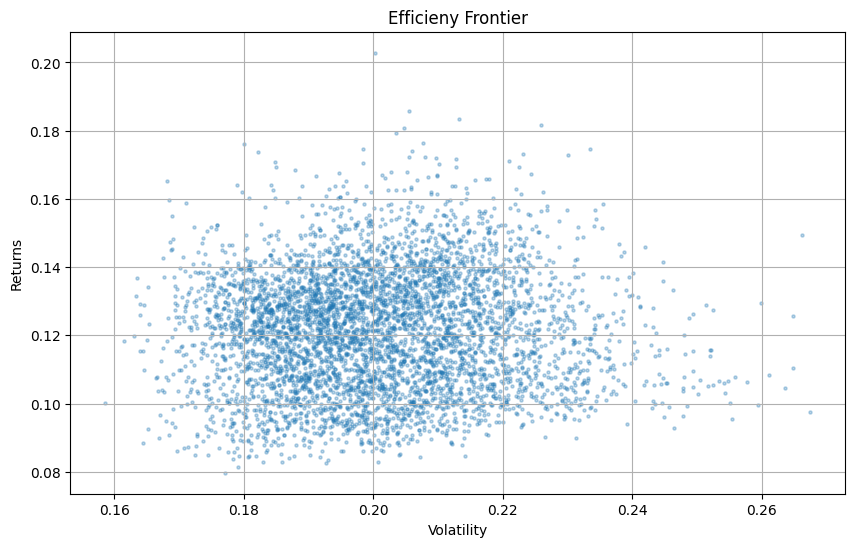

In [17]:
# Plot the efficient frontier
portfolios.plot.scatter(
    x ='Volatility', 
    y ='Returns', 
    marker ='o', 
    s = 5, 
    alpha = 0.3,
    grid=True,
    figsize=(10, 6),
    title='Efficieny Frontier'
)


In [18]:
min_vol_portfolio = portfolios.loc[portfolios['Volatility'].idxmin()] # Portfolio with minimum volatility
min_vol_portfolio

Returns        0.100061
Volatility     0.158650
AAPLWeight     0.075506
AMZNWeight     0.043441
BACWeight      0.072567
GOOGLWeight    0.046003
JPMWeight      0.122301
LMTWeight      0.502421
MSFTWeight     0.137762
Name: 2395, dtype: float64

/var/folders/py/pjzjs05s7494ftly1fgt3g0c0000gn/T/ipykernel_43933/3055945735.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_vol_portfolio[1],
/var/folders/py/pjzjs05s7494ftly1fgt3g0c0000gn/T/ipykernel_43933/3055945735.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_vol_portfolio[0],


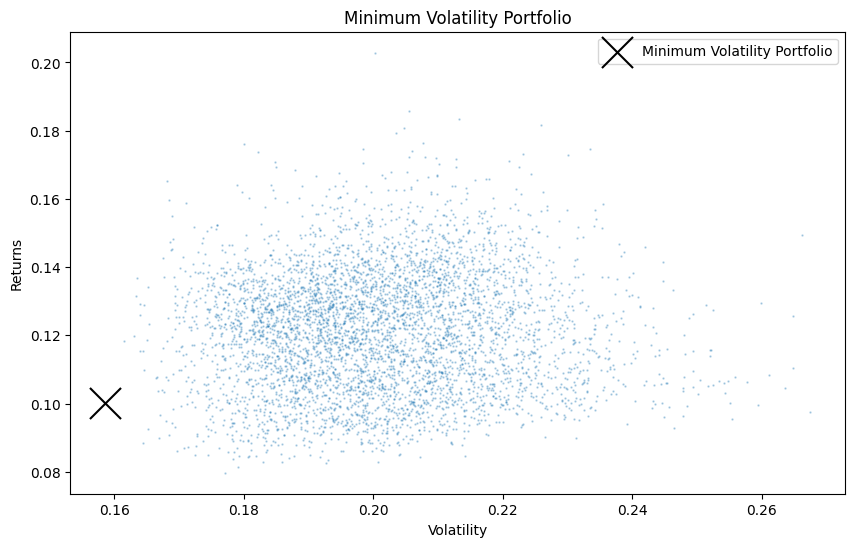

In [19]:
# Plot minimum volatility portfolio
plt.figure(figsize=(10, 6))
plt.scatter(
    portfolios['Volatility'], 
    portfolios['Returns'], 
    marker='o', 
    s=0.5, 
    alpha=0.3
)
plt.scatter(
    min_vol_portfolio[1],
    min_vol_portfolio[0],
    color='black',
    marker='x',
    s=500,
    label='Minimum Volatility Portfolio'
)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Minimum Volatility Portfolio')
plt.legend()



Text(0.5, 1.0, 'Efficient Frontier with all assets colour coded')

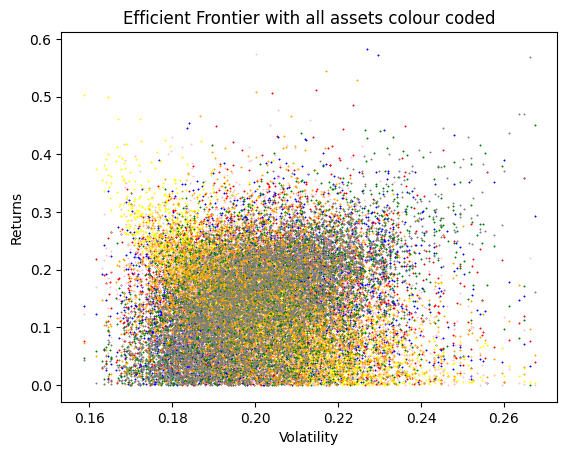

In [20]:
plt.scatter(
    portfolios['Volatility'],
    portfolios['AAPLWeight'],  
    color='red', 
    marker='*', 
    s=0.1, 
    label='Minimum Volatility Portfolio'
)
plt.scatter(
    portfolios['Volatility'],
    portfolios['MSFTWeight'],    
    color='blue', 
    marker='*', 
    s=0.1, 
    label='Minimum Volatility Portfolio'
)
plt.scatter(
    portfolios['Volatility'],
    portfolios['LMTWeight'],  
    color='yellow', 
    marker='*', 
    s=0.1, 
    label='Minimum Volatility Portfolio'
)
plt.scatter(
    portfolios['Volatility'],
    portfolios['JPMWeight'],  
    color='pink', 
    marker='*', 
    s=0.1, 
    label='Minimum Volatility Portfolio'
)
plt.scatter(
    portfolios['Volatility'],
    portfolios['GOOGLWeight'],  
    color='green', 
    marker='*', 
    s=0.1, 
    label='Minimum Volatility Portfolio'
)
plt.scatter(
    portfolios['Volatility'],
    portfolios['BACWeight'],  
    color='orange', 
    marker='*', 
    s=0.1, 
    label='Minimum Volatility Portfolio'
)
plt.scatter(
    portfolios['Volatility'],
    portfolios['AMZNWeight'],  
    color='gray', 
    marker='*', 
    s=0.1, 
    label='Minimum Volatility Portfolio'
)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Efficient Frontier with all assets colour coded')

 

In [21]:
# Optimnal Portfolio
rf = 0.02
opt_risk_portfolio = portfolios.iloc[((portfolios['Returns'] - rf) / portfolios['Volatility']).idxmax()] # Portfolio with maximum Sharpe ratio
opt_risk_portfolio

Returns        0.202864
Volatility     0.200270
AAPLWeight     0.037390
AMZNWeight     0.038582
BACWeight      0.083368
GOOGLWeight    0.153204
JPMWeight      0.574120
LMTWeight      0.084078
MSFTWeight     0.029258
Name: 928, dtype: float64

/var/folders/py/pjzjs05s7494ftly1fgt3g0c0000gn/T/ipykernel_43933/1588029456.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_vol_portfolio[1],
/var/folders/py/pjzjs05s7494ftly1fgt3g0c0000gn/T/ipykernel_43933/1588029456.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_vol_portfolio[0],
/var/folders/py/pjzjs05s7494ftly1fgt3g0c0000gn/T/ipykernel_43933/1588029456.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  opt_r

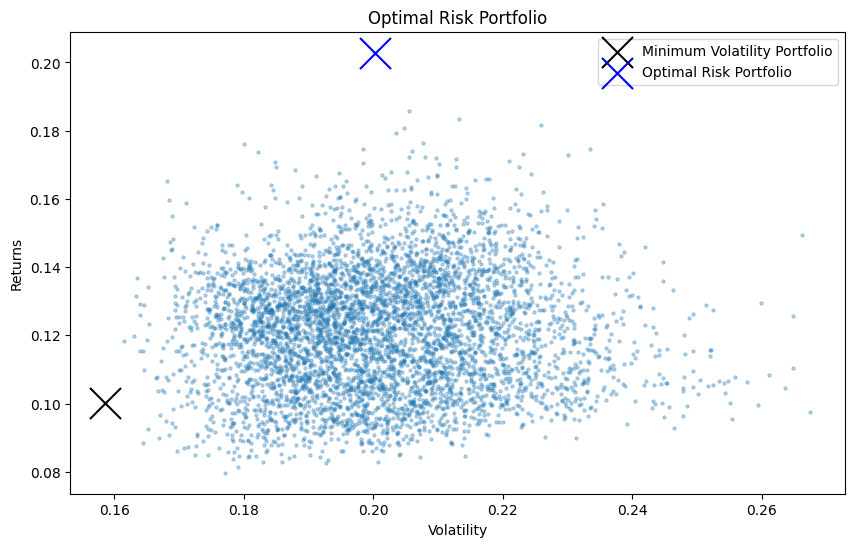

In [22]:
# Plot optimal portfolio
plt.figure(figsize=(10, 6))
plt.scatter(
    portfolios['Volatility'], 
    portfolios['Returns'], 
    marker='o', 
    s=5, 
    alpha=0.3
)
plt.scatter(
    min_vol_portfolio[1],
    min_vol_portfolio[0],
    color='black',
    marker='x',
    s=500,
    label='Minimum Volatility Portfolio'
)
plt.scatter(
    opt_risk_portfolio[1], 
    opt_risk_portfolio[0], 
    color='blue', 
    marker='x', 
    s=500, 
    label='Optimal Risk Portfolio'
)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Optimal Risk Portfolio')
plt.legend()


/var/folders/py/pjzjs05s7494ftly1fgt3g0c0000gn/T/ipykernel_43933/1602003358.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_vol_portfolio[1],
/var/folders/py/pjzjs05s7494ftly1fgt3g0c0000gn/T/ipykernel_43933/1602003358.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_vol_portfolio[0],
/var/folders/py/pjzjs05s7494ftly1fgt3g0c0000gn/T/ipykernel_43933/1602003358.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  opt_r

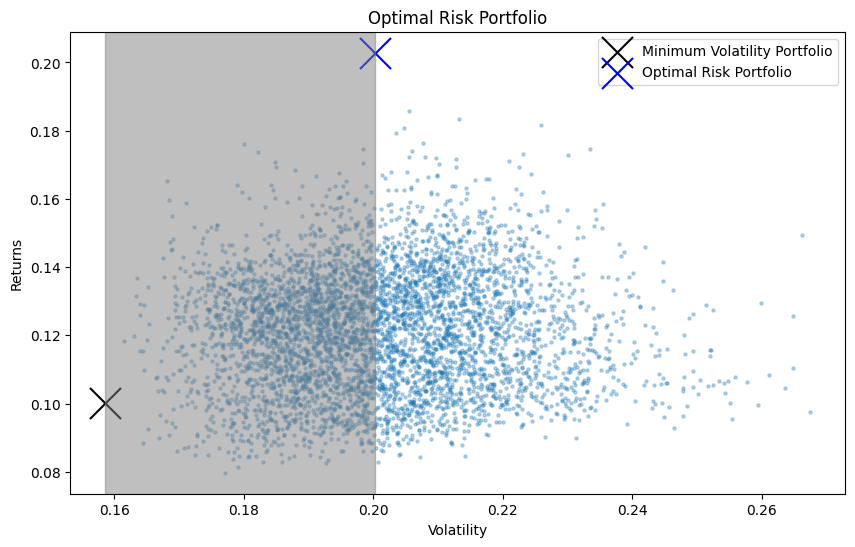

In [23]:
# Plot optimal portfolio
plt.figure(figsize=(10, 6))
plt.scatter(
    portfolios['Volatility'], 
    portfolios['Returns'], 
    marker='o', 
    s=5, 
    alpha=0.3
)
plt.scatter(
    min_vol_portfolio[1],
    min_vol_portfolio[0],
    color='black',
    marker='x',
    s=500,
    label='Minimum Volatility Portfolio'
)
plt.scatter(
    opt_risk_portfolio[1], 
    opt_risk_portfolio[0], 
    color='blue', 
    marker='x', 
    s=500, 
    label='Optimal Risk Portfolio'
)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Optimal Risk Portfolio')
plt.legend()
plt.axvspan( min_vol_portfolio[1], opt_risk_portfolio[1], alpha=0.5, color='gray')